# Titanic: Machine Learning from Disaster
## Importing the necessary libraries and the dataset

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [2]:
api.competition_download_files('titanic')

In [3]:
import zipfile
with zipfile.ZipFile('titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('titanic')

In [4]:
import pandas as pd
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

## Data Analysis and Preprocessing

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


NaN Value percentages in descending order:

In [7]:
null_set = train.isna().sum() / train.shape[0] * 100
null_set[null_set > 0].sort_values(ascending=False)

Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='Survived'>

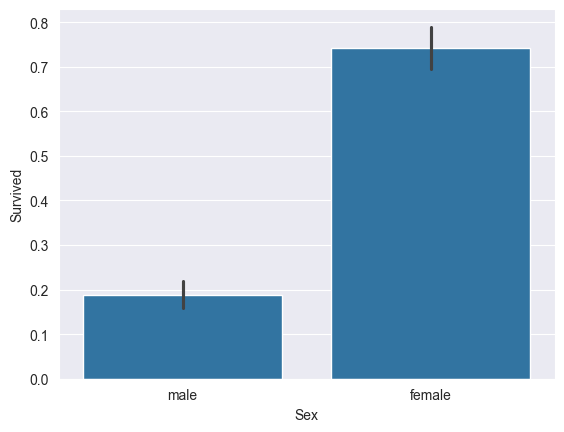

In [9]:
#Bar plot of survival by sex
sns.barplot(x='Sex', y='Survived', data=train)

Dropping Ticket, Cabin and Fare columns for irrelevant data.

In [10]:
train = train.drop(['Ticket', 'Cabin', 'Fare'], axis=1)
test = test.drop(['Ticket', 'Cabin', 'Fare'], axis=1)

<Axes: >

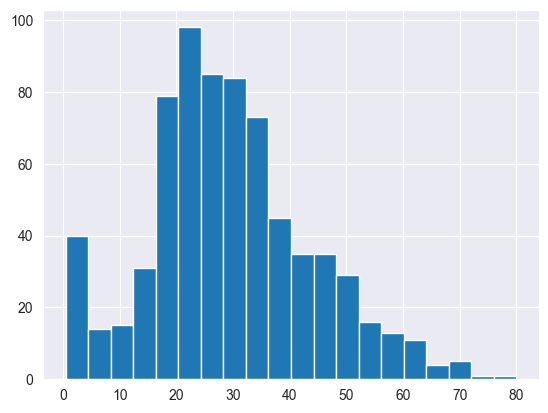

In [11]:
train['Age'].hist(bins=20)

Filling missing values in Age and Embarked columns

For Age, we will fill the missing values with random integers between the mean - std and mean + std.

For Embarked, we will fill the missing values with the most common value.

In [12]:
import numpy as np
age_mean = train['Age'].mean()
age_std = train['Age'].std()

train['Age'] = train['Age'].fillna(np.random.randint(age_mean - age_std, age_mean + age_std))

age_mean_test = test['Age'].mean()
age_std_test = test['Age'].std()

test['Age'] = test['Age'].fillna(np.random.randint(age_mean_test - age_std_test, age_mean_test + age_std_test))

In [13]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
train['Embarked'] = train['Embarked'].fillna('S')

In [15]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [16]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

Converting sex and embarked values to numerical values

In [17]:
sex_dictionary = {'female':1 ,'male':0 }
train['Sex'] = train['Sex'].map(sex_dictionary)
test['Sex'] = test['Sex'].map(sex_dictionary)

In [18]:
embarked_dictionary = {'S':0, 'C':1, 'Q':2}
train['Embarked'] = train['Embarked'].map(embarked_dictionary)
test['Embarked'] = test['Embarked'].map(embarked_dictionary)

In [19]:
test.drop('Name', axis=1, inplace=True)
train.drop('Name', axis=1, inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,0,34.5,0,0,2
1,893,3,1,47.0,1,0,0
2,894,2,0,62.0,0,0,2
3,895,3,0,27.0,0,0,0
4,896,3,1,22.0,1,1,0


In [20]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,30.553502,0.523008,0.381594,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.114890,1.102743,0.806057,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,32.000000,0.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,2.000000


## Feature Scaling

We will use Z-score normalization for Age column.

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train['Age'] = scaler.fit_transform(train['Age'].values.reshape(-1, 1))
test['Age'] = scaler.transform(test['Age'].values.reshape(-1, 1))

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,0,-0.652564,1,0,0
1,2,1,1,1,0.568109,1,0,1
2,3,1,3,1,-0.347396,0,0,0
3,4,1,1,1,0.339232,1,0,0
4,5,0,3,0,0.339232,0,0,0


## Model Building

Splitting the data into training and validation sets

In [23]:
import sklearn

In [24]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Modeling the data

In [25]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

80.2


In [26]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.71


In [27]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

81.73


In [28]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(dual=False)
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.71


In [29]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

77.66


In [30]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

78.68


In [32]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

80.71


In [33]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

78.68


In [34]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


## Results

Comparing the models

In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC',
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg,
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.26
0,Support Vector Machines,81.73
1,KNN,80.71
2,Logistic Regression,80.71
6,Linear SVC,80.71
4,Naive Bayes,80.20
7,Decision Tree,80.20
3,Random Forest,78.68
8,Stochastic Gradient Descent,78.68
5,Perceptron,77.66


## Generating the submission file

In [36]:
#set ids as PassengerId and predict survival
ids = test['PassengerId']
predictions = gbk.predict(test.drop('PassengerId', axis=1))

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('submission.csv', index=False)